In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chess/games.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../input/chess/games.csv")
df.head(5)

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


In [3]:
# Display basic information about the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  int64  
 12  moves           20058 non-null  object 
 13  opening_eco     20058 non-null  object 
 14  opening_name    20058 non-null  object 
 15  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.3+ MB


In [4]:
df.head(5)

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


In [5]:
# Checking for missing values
missing_values = df.isnull().sum()

# Descriptive statistics for numerical columns
descriptive_stats = df.describe()

missing_values, descriptive_stats


(id                0
 rated             0
 created_at        0
 last_move_at      0
 turns             0
 victory_status    0
 winner            0
 increment_code    0
 white_id          0
 white_rating      0
 black_id          0
 black_rating      0
 moves             0
 opening_eco       0
 opening_name      0
 opening_ply       0
 dtype: int64,
          created_at  last_move_at         turns  white_rating  black_rating  \
 count  2.005800e+04  2.005800e+04  20058.000000  20058.000000  20058.000000   
 mean   1.483617e+12  1.483618e+12     60.465999   1596.631868   1588.831987   
 std    2.850151e+10  2.850140e+10     33.570585    291.253376    291.036126   
 min    1.376772e+12  1.376772e+12      1.000000    784.000000    789.000000   
 25%    1.477548e+12  1.477548e+12     37.000000   1398.000000   1391.000000   
 50%    1.496010e+12  1.496010e+12     55.000000   1567.000000   1562.000000   
 75%    1.503170e+12  1.503170e+12     79.000000   1793.000000   1784.000000   
 max    1

We see that our dataset has no misisng values. 
Just from the descriptive stats summary, we see that: 
1. The mean rating for white players is approximately 1597, and for black players, it is 1589. If we look at the min-max range, we see white having (784, 2700) and black having (291, 2723). 
2. In terms of duration of the games, we have an avearge of 60 moves, and the fastest win is 1 move. We can assume that this is due to a player aborting the game. We have a maximum of 349 moves, and a guess for this (which may or may not be investigated later) is that we had a competitive endgame with lot of pawn and king movements. Note that these are just hypothesis for now. 
3. The average number of half-moves (ply) before the opening ends is about 5, with a range from 1 to 28 moves.

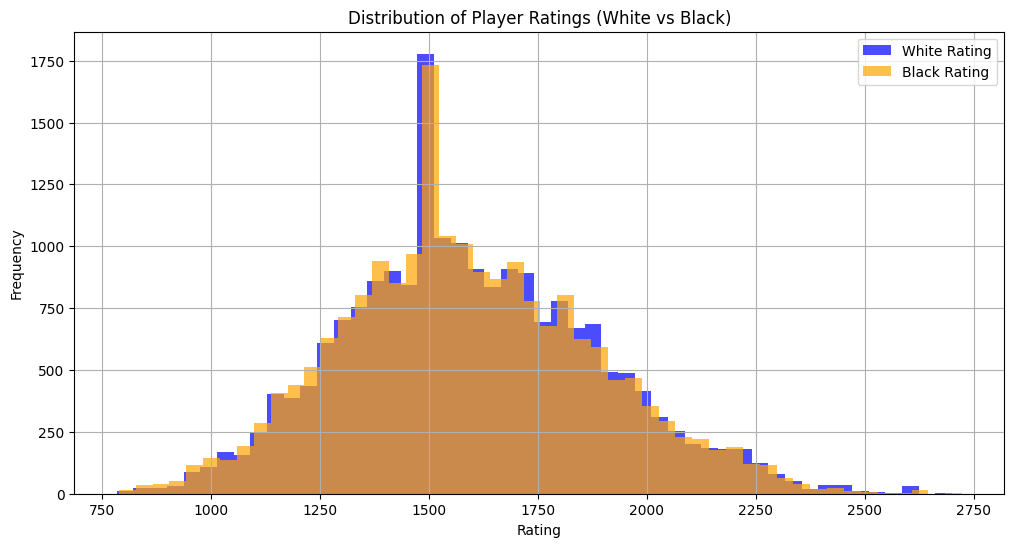

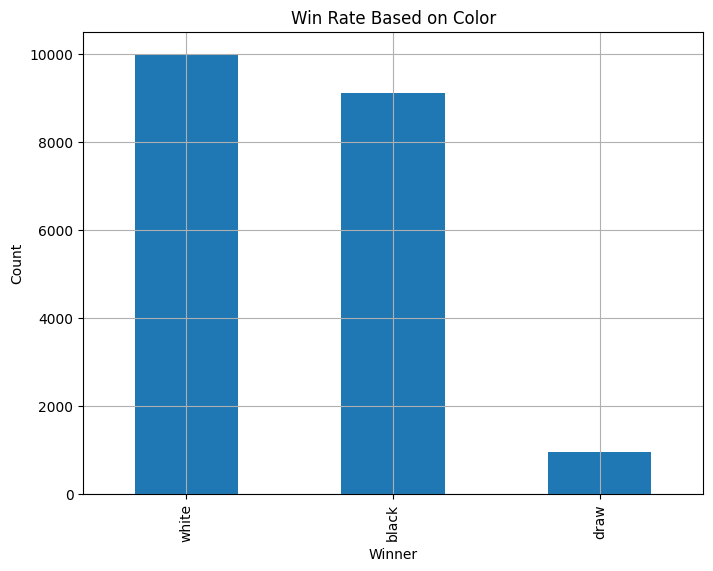

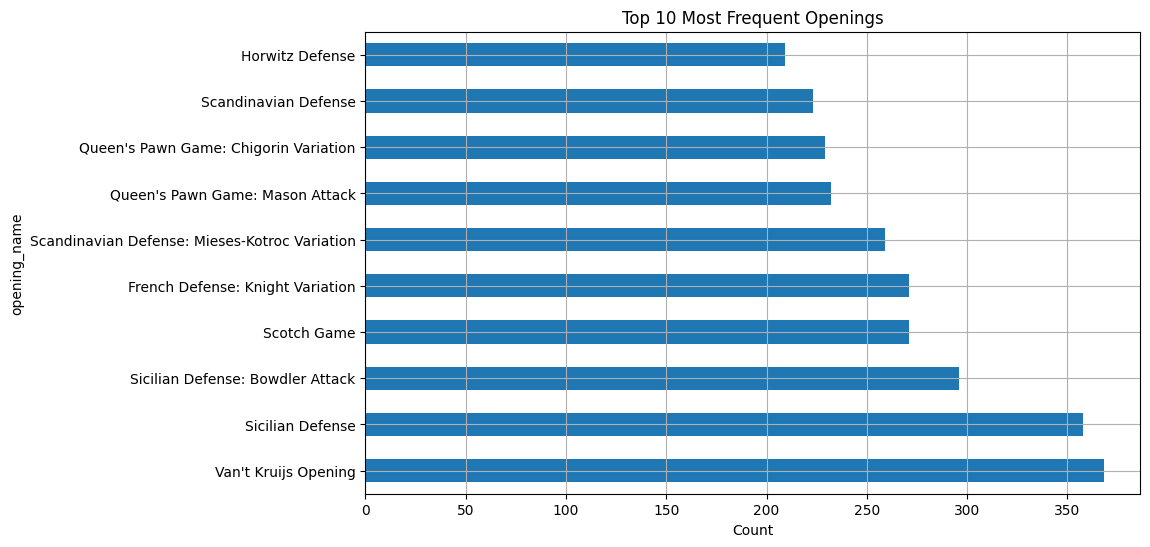

In [6]:
import matplotlib.pyplot as plt

# Plotting distribution of player ratings
plt.figure(figsize=(12, 6))
plt.hist(df['white_rating'], bins=50, alpha=0.7, label='White Rating', color='blue')
plt.hist(df['black_rating'], bins=50, alpha=0.7, label='Black Rating', color='orange')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Player Ratings (White vs Black)')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# Analyzing win rate based on color
color_outcomes = df['winner'].value_counts()
color_outcomes.plot(kind='bar', figsize=(8, 6))
plt.title('Win Rate Based on Color')
plt.ylabel('Count')
plt.xlabel('Winner')
plt.grid(True)
plt.show()

# Analyzing the impact of openings on outcomes
top_openings = df['opening_name'].value_counts().nlargest(10)
top_openings.plot(kind='barh', figsize=(10, 6))
plt.title('Top 10 Most Frequent Openings')
plt.xlabel('Count')
plt.grid(True)
plt.show()
